# Feature set 3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import time
from keras.callbacks import EarlyStopping

from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,merge,Activation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


#### Extracting data from csv files into numpy arrays

In [2]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
files_data=np.array(['fold_data_1.csv','fold_data_2.csv','fold_data_3.csv','fold_data_4.csv','fold_data_5.csv',
                'fold_data_6.csv','fold_data_7.csv','fold_data_8.csv','fold_data_9.csv','fold_data_10.csv'])
X_folds= np.array([genfromtxt(file,delimiter=',') for file in files_data])

files_label=(['fold_labels_1.csv','fold_labels_2.csv','fold_labels_3.csv','fold_labels_4.csv','fold_labels_5.csv',
                'fold_labels_6.csv','fold_labels_7.csv','fold_labels_8.csv','fold_labels_9.csv','fold_labels_10.csv'])
Y_folds= np.array([genfromtxt(file,delimiter=',') for file in files_label])

In [4]:
def data_processor_cnn(X_folds,Y_folds):
    Y_folds=([to_categorical(Y_folds, num_classes=10) for Y_folds in Y_folds])
    for i in range(0, len(X_folds)):
        X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 32, 8))
    return X_folds,Y_folds

In [5]:
def data_processor_basic_nn(X_fold,Y_folds):
    for i in range(0, len(Y_folds)):
        Y_folds[i]=np.reshape(Y_folds[i],(Y_folds[i].shape[0], 1))
    for i in range(0, len(X_folds)):
        X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 32, 8))
    return X_folds,Y_folds

In [6]:
def data_processor_log_reg(X_fold,Y_folds):
    for i in range(0, len(Y_folds)):
        Y_folds[i]=np.reshape(Y_folds[i],(Y_folds[i].shape[0], 1))
    for i in range(0, len(X_folds)):
        X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 256))
    return X_folds,Y_folds

In [7]:
Data_cnn=data_processor_cnn(X_folds,Y_folds)
X_folds_10=Data_cnn[0]
Y_folds_10=Data_cnn[1]

In [8]:
Data_Linear=data_processor_basic_nn(X_folds,Y_folds)
X_folds_1=Data_Linear[0]
Y_folds_1=Data_Linear[1]

In [9]:
Data_Linear=data_processor_log_reg(X_folds,Y_folds)
X_folds_1=Data_Linear[0]
Y_folds_1=Data_Linear[1]

#### Shapes of the data


In [10]:
for i in range((10)):
    print("X_data",i+1,"=",np.shape(X_folds_10[i]))
    print("Y_data",i+1,"=",np.shape(Y_folds_10[i]))

X_data 1 = (873, 256)
Y_data 1 = (873, 10)
X_data 2 = (888, 256)
Y_data 2 = (888, 10)
X_data 3 = (925, 256)
Y_data 3 = (925, 10)
X_data 4 = (990, 256)
Y_data 4 = (990, 10)
X_data 5 = (936, 256)
Y_data 5 = (936, 10)
X_data 6 = (823, 256)
Y_data 6 = (823, 10)
X_data 7 = (838, 256)
Y_data 7 = (838, 10)
X_data 8 = (806, 256)
Y_data 8 = (806, 10)
X_data 9 = (816, 256)
Y_data 9 = (816, 10)
X_data 10 = (837, 256)
Y_data 10 = (837, 10)


## Defining Functions

## Simple nn models as function

In [11]:
def Model_run_nn(model_history,model,X_folds,Y_folds,Accuracy_array,accuracy_total,end_array,Epoch_array_accuracy,Loss_array,
             Fold_accuracy,Val_accuracy_array,Val_Loss_array):
   
    fold=0
    for i in range(10):
        start = time.time()
        fold+=1
        print(f"\nFold #{fold}\n- - - - - - - - - - - - - - - - - - - -")

        x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
        y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
        x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
        y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
        print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
        model_history = model.fit(x_train,y_train,batch_size=Batch_size,epochs=Epoch_number,validation_data=(x_test,y_test)
                                  ,verbose=0)
        
        model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
        score=model_evaluation[1]
        accuracy_score.append(score)
        
        accuracy=model_history.history['accuracy']
        accuracy_avg=np.mean(accuracy)
        
        Fold_accuracy.append(accuracy_avg)
        print(f"Accuracy of Fold {fold} is {accuracy_avg}")
        end = time.time()
        print("Time to train Fold", fold,":",round(((end)- (start)),4),"seconds.")
        end_array.append(round(((end)- (start)),4))
        
    
        Epoch_array=model_history.history['accuracy']
        Epoch_array_accuracy.append(Epoch_array)
        loss=model_history.history['loss']
        Loss_array.append(loss)
    
        Epoch_val_array=model_history.history['val_accuracy']
        Val_accuracy_array.append(Epoch_val_array)
    
        loss_val=model_history.history['val_loss']
        Val_Loss_array.append(loss_val)
    
    Avg_Accuracy=np.mean(Fold_accuracy)       
    Time=sum(end_array)
    print("\n - - - - - - - - - - - - - - -\nThe average accuracy of the model:",(Avg_Accuracy))
    print("The time taken to run model:",Time)
    return Avg_Accuracy,Time

In [12]:
def Model_run_nn_es(model_history,model,X_folds,Y_folds,Accuracy_array,accuracy_total,end_array,Epoch_array_accuracy,Loss_array,
             Fold_accuracy,Val_accuracy_array,Val_Loss_array):
    
    for i in range(0, len(X_folds)):
        X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 32, 8, 1))
    fold=0
    for i in range(10):
        start = time.time()
        fold+=1
        print(f"\nFold #{fold}\n- - - - - - - - - - - - - - - - - - - -")

        x_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i!=j])
        y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i!=j])
        x_test = np.vstack([X_folds[j] for j in range(0, len(Y_folds)) if i==j])
        y_test = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)) if i==j])
        print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
        model_history = model.fit(x_train,y_train,epochs=Epoch_number,validation_data=(x_test,y_test)
                                  ,verbose=0, callbacks=[early_stopping_cb])
        
        model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
        score=model_evaluation[1]
        accuracy_score.append(score)
        
        accuracy=model_history.history['accuracy']
        accuracy_avg=np.mean(accuracy)
        
        Fold_accuracy.append(accuracy_avg)
        print(f"Accuracy of Fold {fold} is {accuracy_avg}")
        end = time.time()
        print("Time to train Fold", fold,":",round(((end)- (start)),4),"seconds.")
        end_array.append(round(((end)- (start)),4))
        
    
        Epoch_array=model_history.history['accuracy']
        Epoch_array_accuracy.append(Epoch_array)
        loss=model_history.history['loss']
        Loss_array.append(loss)
    
        Epoch_val_array=model_history.history['val_accuracy']
        Val_accuracy_array.append(Epoch_val_array)
    
        loss_val=model_history.history['val_loss']
        Val_Loss_array.append(loss_val)
    
    Avg_Accuracy=np.mean(Fold_accuracy)       
    Time=sum(end_array)
    print("\n - - - - - - - - - - - - - - -\nThe average accuracy of the model:",(Avg_Accuracy))
    print("The time taken to run model:",Time)
    return Avg_Accuracy,Time

### Graph plotting function

In [13]:
def Graph_func(Epoch_number,Epoch_array_accuracy,Val_accuracy_array,Loss_array,Val_loss_array):
    %matplotlib inline
    
    fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig.suptitle(f"Accuracy of each Epoch for each Fold")
    ax1.set_xlabel("Epoch number")
    ax1.set_ylabel("Accuracy")
    ax1.grid()
    for i in range(10):
        ax1.plot(Epoch_array_accuracy[i],label=('Fold',i+1))
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    
    fig,ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig.suptitle(f"Accuracy of each Epoch for each Fold")
    ax1.set_xlabel("Epoch number")
    ax1.set_ylabel("Val Accuracy")
    ax1.grid()
    for i in range(10):
        ax1.plot(Val_accuracy_array[i],label=('Fold',i+1))
        ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig1.suptitle(f"Loss of each Epoch for each Fold")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.grid()
    for i in range(10):
        ax2.plot(Loss_array[i],label=('Fold',i+1))
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
    
    fig1,ax2 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    fig1.suptitle(f"Val Loss of each Epoch for each Fold")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Val Loss")
    ax2.grid()
    for i in range(10):
        ax2.plot(Val_Loss_array[i],label=('Fold',i+1))
        ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))   

### Table making function

In [14]:
def table_maker(Fold_accuracy,end_array,Avg_Accuracy,Time):
    data= {'Fold': ['1','2','3','4','5','6','7','8','9','10'],
           'Accuracy': [Fold_accuracy[0],Fold_accuracy[1],Fold_accuracy[2],Fold_accuracy[3],Fold_accuracy[4],
                    Fold_accuracy[5],Fold_accuracy[6],Fold_accuracy[7],Fold_accuracy[8],Fold_accuracy[9]],
           'Time Taken' :[end_array[0],end_array[1],end_array[2],end_array[3],end_array[4],end_array[5],end_array[6],end_array[7],
                end_array[8],end_array[9]]}
    df = pd.DataFrame(data, columns = ['Fold', 'Accuracy','Time Taken'])
    data_avg={'Average Accuracy':[Avg_Accuracy],'Total Time':[Time]}
    df_avg=pd.DataFrame(data_avg,columns=['Average Accuracy','Total Time'])
    print (df)
    print ("\n",df_avg)

### Average graph function

In [15]:
def Graph_Avg_maker(Fold_accuracy,Avg_Accuracy):
    %matplotlib inline
    Fold_iteration=np.linspace(1,10,num=10)
    fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())
    ax1.plot(Fold_iteration,Fold_accuracy,"gx")
    ax1.axhline(y=Avg_Accuracy,label='Average Accuracy')
    fig.suptitle(f"Results for Batch size of {Batch_size}\n and Epoch number of {Epoch_number}\n for Feature set 1")
    ax1.set_xlabel("Fold iteration")
    ax1.set_ylabel("Accuracy")
    ax1.grid()
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Confusion Matrix function 

In [16]:
import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def Confusion_matrix(x_test, y_test_a, model=None):

    if model == None:
        return 'Please pass a defined model to this function'
    
    # Create predictions
    try:
        y_test_pred = model.predict_classes(x_test)
    except:
        y_test_pred = model.predict(x_test)
    
    # Read file with the defined classes (should be available in every folder)
    classes = pd.read_csv("classes.csv")
    classes = classes['class'].tolist()
    
    # Create confusion matrix
    array = sklearn.metrics.confusion_matrix(y_test_a, y_test_pred)

    axis_labels = classes # labels for x and y axis

    # create seaborn heatmap with required labels
    plt.figure(figsize = (12, 10))
    sn.heatmap(array, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
    # fixing axis that are cut otherwise
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

# Models

## Model 1

In [17]:
model=Sequential()
model.add(Flatten(input_shape=[32, 8]))
model.add(Dense(300, activation="relu"))   
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
Model=model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [18]:
Accuracy_array=[]
accuracy_total=0
end_array=[]
Epoch_array_accuracy=[]
Loss_array=[]
Fold_accuracy=[]
Val_accuracy_array=[]
Val_Loss_array=[]
Avg_Accuracy=[]
Time=[]
accuracy_score=[]

Epoch_number=50
Batch_size=30

Model=Model_run_nn(Model,model,X_folds_1,Y_folds_1,Accuracy_array,
                   accuracy_total,end_array,Epoch_array_accuracy,Loss_array,
                   Fold_accuracy,Val_accuracy_array,Val_Loss_array)

Avg_Accuracy=Model[0]
Time=Model[1]


Fold #1
- - - - - - - - - - - - - - - - - - - -
(7859, 256) (7859, 1) (873, 256) (873, 1)


ValueError: Error when checking input: expected flatten_1_input to have 3 dimensions, but got array with shape (7859, 256)

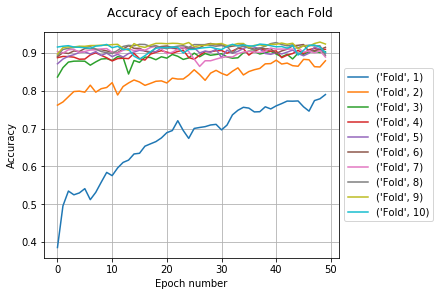

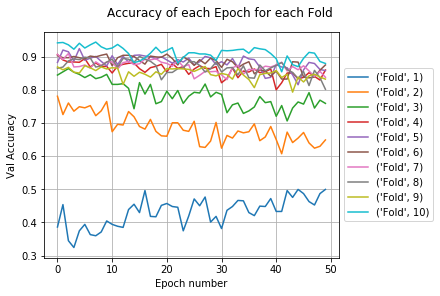

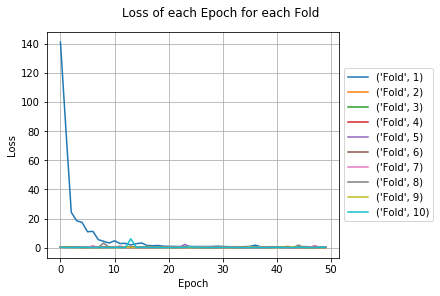

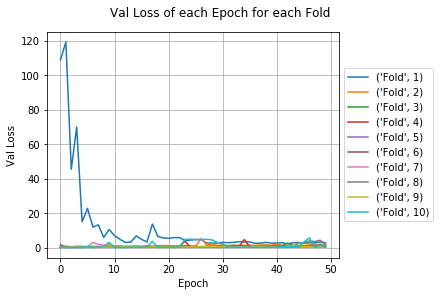

In [15]:
Graph_Epochs_model_1=Graph_func(Epoch_number,Epoch_array_accuracy,Val_accuracy_array,Loss_array,Val_Loss_array)

In [16]:
Table_model_1=table_maker(Fold_accuracy,end_array,Avg_Accuracy,Time)

  Fold  Accuracy  Time Taken
0    1  0.672139     41.5189
1    2  0.835617     40.6719
2    3  0.888111     39.4277
3    4  0.897817     49.4914
4    5  0.902501     48.4968
5    6  0.911539     47.8849
6    7  0.902587     40.7234
7    8  0.915264     44.0549
8    9  0.920518     40.9867
9   10  0.913211     42.5352

    Average Accuracy  Total Time
0           0.87593    435.7918


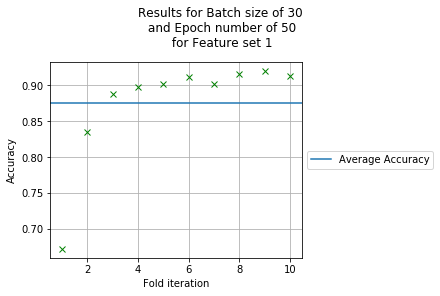

In [17]:
Graph_Avg_model_1=Graph_Avg_maker(Fold_accuracy,Avg_Accuracy)

#### Model 1 with no cross validation

In [18]:
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 32, 8))

X_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)-1)])
y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)-1)])
X_test = X_folds[9]
y_test = Y_folds[9]

Epoch_number=30

#compile model using accuracy to measure model performance
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
cnn_model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epoch_number)
score_model_1_no_cross=model.evaluate(X_test, y_test)
accuracy_model_1_no_cross = score_model_1_no_cross[1]
print(f"\nAccuracy of model 1 with no cross validation: {round(accuracy_model_1_no_cross,3)}")

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - ETA: 0s - loss: 0.3071 - accuracy: 0.87 - ETA: 0s - loss: 0.2451 - accuracy: 0.91 - ETA: 0s - loss: 0.2840 - accuracy: 0.90 - ETA: 0s - loss: 0.2672 - accuracy: 0.90 - ETA: 0s - loss: 0.2675 - accuracy: 0.91 - ETA: 0s - loss: 0.2606 - accuracy: 0.91 - ETA: 0s - loss: 0.2682 - accuracy: 0.91 - ETA: 0s - loss: 0.2634 - accuracy: 0.91 - ETA: 0s - loss: 0.2666 - accuracy: 0.91 - ETA: 0s - loss: 0.2709 - accuracy: 0.90 - ETA: 0s - loss: 0.2812 - accuracy: 0.90 - ETA: 0s - loss: 0.2775 - accuracy: 0.90 - ETA: 0s - loss: 0.2737 - accuracy: 0.90 - ETA: 0s - loss: 0.2729 - accuracy: 0.90 - ETA: 0s - loss: 0.2739 - accuracy: 0.90 - ETA: 0s - loss: 0.2769 - accuracy: 0.90 - ETA: 0s - loss: 0.2714 - accuracy: 0.90 - 1s 114us/step - loss: 0.2703 - accuracy: 0.9092 - val_loss: 1.3697 - val_accuracy: 0.9056
Epoch 2/30
7895/7895 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.

# Model 2

In [19]:
#adding layers and forming the model_1
#forming model_1
model_2=Sequential()
early_stopping_cb = EarlyStopping(patience=16, restore_best_weights=True)

    #add model layers
model_2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32, 8, 1)))
model_2.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))
    #compile model using accuracy to measure model performance
Model_2=model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
Accuracy_array_2=[]
accuracy_total_2=0
end_array_2=[]

Epoch_array_accuracy_2=[]
Loss_array_2=[]
Fold_accuracy_2=[]

Val_accuracy_array_2=[]
Val_Loss_array_2=[]

Avg_Accuracy_2=[]
Time_2=[]

accuracy_score=[]
Epoch_number=50
Batch_size=30

Model_2=Model_run_nn_es(Model_2,model_2,X_folds_10,Y_folds_10,Accuracy_array_2,
                     accuracy_total_2,end_array_2,Epoch_array_accuracy_2,Loss_array_2,
                     Fold_accuracy_2,Val_accuracy_array_2,Val_Loss_array_2)
Avg_Accuracy_2=Model_2[0]
Time_2=Model_2[1]


Fold #1
- - - - - - - - - - - - - - - - - - - -
(7859, 40, 6, 1) (7859, 10) (873, 40, 6, 1) (873, 10)
Accuracy of Fold 1 is 0.8059231638908386
Time to train Fold 1 : 79.0244 seconds.

Fold #2
- - - - - - - - - - - - - - - - - - - -
(7844, 40, 6, 1) (7844, 10) (888, 40, 6, 1) (888, 10)
Accuracy of Fold 2 is 0.8907310962677002
Time to train Fold 2 : 61.4488 seconds.

Fold #3
- - - - - - - - - - - - - - - - - - - -
(7807, 40, 6, 1) (7807, 10) (925, 40, 6, 1) (925, 10)
Accuracy of Fold 3 is 0.9050474762916565
Time to train Fold 3 : 48.7614 seconds.

Fold #4
- - - - - - - - - - - - - - - - - - - -
(7742, 40, 6, 1) (7742, 10) (990, 40, 6, 1) (990, 10)
Accuracy of Fold 4 is 0.896690309047699
Time to train Fold 4 : 44.0253 seconds.

Fold #5
- - - - - - - - - - - - - - - - - - - -
(7796, 40, 6, 1) (7796, 10) (936, 40, 6, 1) (936, 10)
Accuracy of Fold 5 is 0.9220263957977295
Time to train Fold 5 : 55.818 seconds.

Fold #6
- - - - - - - - - - - - - - - - - - - -
(7909, 40, 6, 1) (7909, 10) (823,

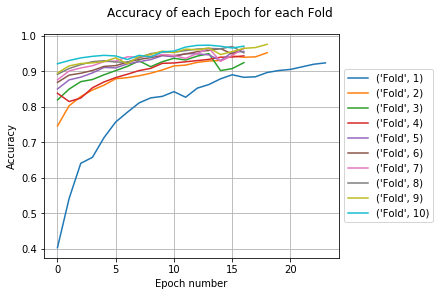

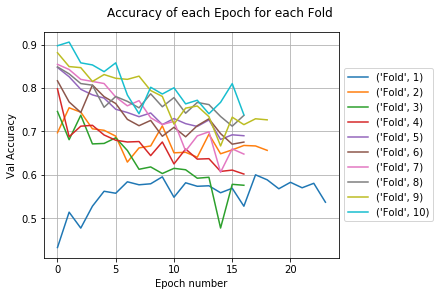

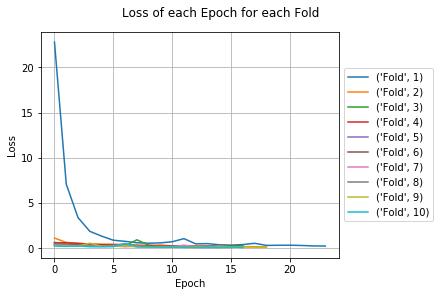

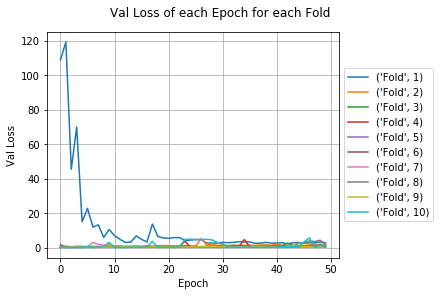

In [21]:
Graph_Epochs_model_2=Graph_func(Epoch_number,Epoch_array_accuracy_2,Val_accuracy_array_2,Loss_array_2,Val_Loss_array_2) 

In [22]:
Table_model_2=table_maker(Fold_accuracy_2,end_array_2,Avg_Accuracy_2,Time_2)

  Fold  Accuracy  Time Taken
0    1  0.805923     79.0244
1    2  0.890731     61.4488
2    3  0.905047     48.7614
3    4  0.896690     44.0253
4    5  0.922026     55.8180
5    6  0.930094     57.0696
6    7  0.932950     53.0567
7    8  0.940731     56.6301
8    9  0.944157     64.8578
9   10  0.951280     56.3990

    Average Accuracy  Total Time
0          0.911963    577.0911


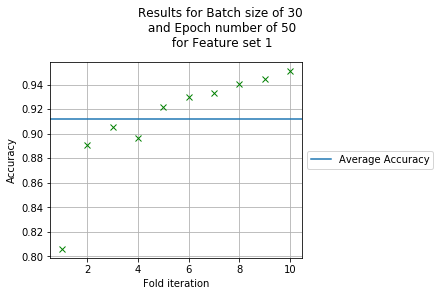

In [23]:
Graph_Avg_model_2=Graph_Avg_maker(Fold_accuracy_2,Avg_Accuracy_2)

### Model 2 with no cross validation

In [24]:
for i in range(0, len(X_folds)):
    X_folds[i]=np.reshape(X_folds[i],(X_folds[i].shape[0], 32, 8, 1))

Epoch_number=30
X_train = np.vstack([X_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
y_train = np.vstack([Y_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
X_test = X_folds_10[9]
y_test = Y_folds_10[9]

cnn_model_2_history = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epoch_number)
score_model_2_no_cross=model_2.evaluate(X_test, y_test)
accuracy_model_2_no_cross = score_model_2_no_cross[1]
print(f"\nAccuracy of model 2 with no cross validation: {round(accuracy_model_2_no_cross,3)}")

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - ETA: 3s - loss: 0.1497 - accuracy: 1.00 - ETA: 3s - loss: 0.1724 - accuracy: 0.95 - ETA: 3s - loss: 0.1567 - accuracy: 0.95 - ETA: 3s - loss: 0.1460 - accuracy: 0.95 - ETA: 3s - loss: 0.1550 - accuracy: 0.94 - ETA: 3s - loss: 0.1549 - accuracy: 0.94 - ETA: 3s - loss: 0.2777 - accuracy: 0.94 - ETA: 3s - loss: 0.3363 - accuracy: 0.93 - ETA: 3s - loss: 0.3232 - accuracy: 0.93 - ETA: 3s - loss: 0.3128 - accuracy: 0.93 - ETA: 3s - loss: 0.3055 - accuracy: 0.93 - ETA: 3s - loss: 0.2946 - accuracy: 0.93 - ETA: 3s - loss: 0.2821 - accuracy: 0.93 - ETA: 2s - loss: 0.2775 - accuracy: 0.92 - ETA: 2s - loss: 0.2728 - accuracy: 0.92 - ETA: 2s - loss: 0.2689 - accuracy: 0.93 - ETA: 2s - loss: 0.2659 - accuracy: 0.93 - ETA: 2s - loss: 0.2617 - accuracy: 0.93 - ETA: 2s - loss: 0.2565 - accuracy: 0.93 - ETA: 2s - loss: 0.2545 - accuracy: 0.92 - ETA: 2s - loss: 0.2532 - accuracy: 0.93 - ETA: 2s - loss:

## Model 3

In [25]:
model_3=Sequential()
early_stopping_cb = EarlyStopping(patience=17, restore_best_weights=True)

model_3.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(32,8,1)))
model_3.add(MaxPooling2D(padding="same"))

model_3.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model_3.add(MaxPooling2D(padding="same"))
model_3.add(Dropout(0.2))

model_3.add(Flatten())

model_3.add(Dense(128,activation="relu"))
model_3.add(Dropout(0.2))

model_3.add(Dense(10,activation="softmax"))

    #compiling
Model_3=model_3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
Accuracy_array_3=[]
accuracy_total_3=0
end_array_3=[]

Epoch_array_accuracy_3=[]
Loss_array_3=[]
Fold_accuracy_3=[]

Val_accuracy_array_3=[]
Val_Loss_array_3=[]

Avg_Accuracy_3=[]
Time_3=[]

accuracy_score=[]
Epoch_number=50
Batch_size=30

Model_3=Model_run_nn_es(Model_3,model_3,X_folds_10,Y_folds_10,Accuracy_array_3,
                     accuracy_total_3,end_array_3,Epoch_array_accuracy_3,Loss_array_3,
                     Fold_accuracy_3,Val_accuracy_array_3,Val_Loss_array_3)
Avg_Accuracy_3=Model_3[0]
Time_3=Model_3[1]


Fold #1
- - - - - - - - - - - - - - - - - - - -
(7859, 40, 6, 1) (7859, 10) (873, 40, 6, 1) (873, 10)
Accuracy of Fold 1 is 0.2872450053691864
Time to train Fold 1 : 116.1737 seconds.

Fold #2
- - - - - - - - - - - - - - - - - - - -
(7844, 40, 6, 1) (7844, 10) (888, 40, 6, 1) (888, 10)
Accuracy of Fold 2 is 0.3622514307498932
Time to train Fold 2 : 235.9073 seconds.

Fold #3
- - - - - - - - - - - - - - - - - - - -
(7807, 40, 6, 1) (7807, 10) (925, 40, 6, 1) (925, 10)
Accuracy of Fold 3 is 0.6131548285484314
Time to train Fold 3 : 93.8602 seconds.

Fold #4
- - - - - - - - - - - - - - - - - - - -
(7742, 40, 6, 1) (7742, 10) (990, 40, 6, 1) (990, 10)
Accuracy of Fold 4 is 0.6139822006225586
Time to train Fold 4 : 93.9829 seconds.

Fold #5
- - - - - - - - - - - - - - - - - - - -
(7796, 40, 6, 1) (7796, 10) (936, 40, 6, 1) (936, 10)
Accuracy of Fold 5 is 0.6347358226776123
Time to train Fold 5 : 93.8972 seconds.

Fold #6
- - - - - - - - - - - - - - - - - - - -
(7909, 40, 6, 1) (7909, 10) (

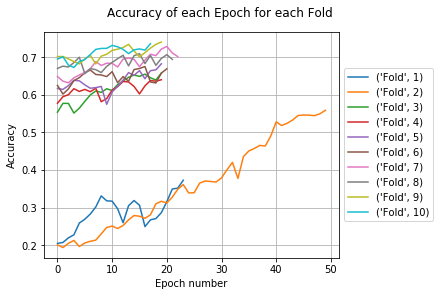

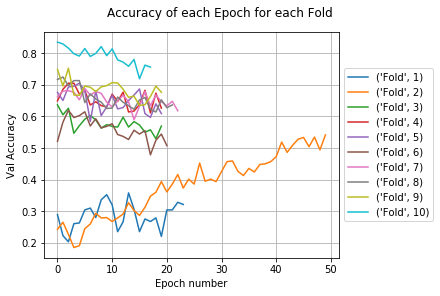

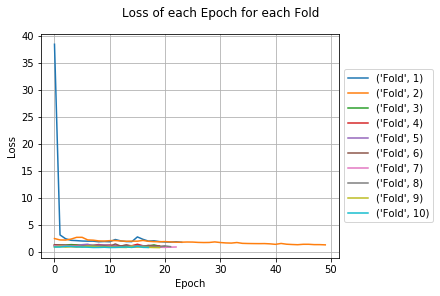

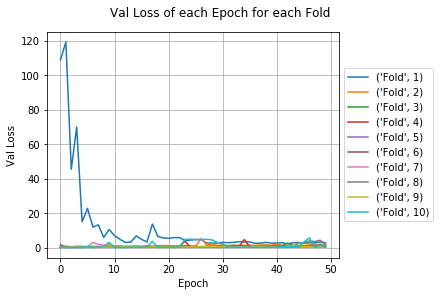

In [27]:
Graph_Epochs_model_3=Graph_func(Epoch_number,Epoch_array_accuracy_3,Val_accuracy_array_3,Loss_array_3,Val_Loss_array_3) 

In [28]:
Table_model_3=table_maker(Fold_accuracy_3,end_array_3,Avg_Accuracy_3,Time_3)

  Fold  Accuracy  Time Taken
0    1  0.287245    116.1737
1    2  0.362251    235.9073
2    3  0.613155     93.8602
3    4  0.613982     93.9829
4    5  0.634736     93.8972
5    6  0.647267     98.9221
6    7  0.681927    111.3790
7    8  0.685374    104.0049
8    9  0.709708     95.6481
9   10  0.710766     87.6936

    Average Accuracy  Total Time
0          0.594641    1131.469


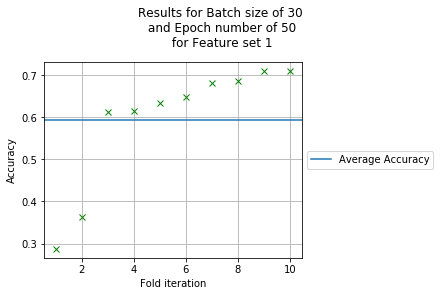

In [29]:
Graph_Avg_model_3=Graph_Avg_maker(Fold_accuracy_3,Avg_Accuracy_3)

In [30]:
X_train = np.vstack([X_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
y_train = np.vstack([Y_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
X_test = X_folds_10[9]
y_test = Y_folds_10[9]

Epoch_number=30
cnn_model_3_history = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epoch_number)
score_model_3_no_cross=model_3.evaluate(X_test, y_test)
accuracy_model_3_no_cross = score_model_3_no_cross[1]
print(f"\nAccuracy of model 3 with no cross validation: {round(accuracy_model_3_no_cross,3)}")

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - ETA: 3s - loss: 0.9161 - accuracy: 0.68 - ETA: 2s - loss: 0.8091 - accuracy: 0.70 - ETA: 2s - loss: 0.8962 - accuracy: 0.68 - ETA: 2s - loss: 0.8559 - accuracy: 0.69 - ETA: 2s - loss: 0.8473 - accuracy: 0.69 - ETA: 2s - loss: 0.8541 - accuracy: 0.69 - ETA: 2s - loss: 0.8324 - accuracy: 0.70 - ETA: 2s - loss: 0.8427 - accuracy: 0.69 - ETA: 2s - loss: 0.8521 - accuracy: 0.69 - ETA: 2s - loss: 0.8466 - accuracy: 0.69 - ETA: 2s - loss: 0.8456 - accuracy: 0.69 - ETA: 2s - loss: 0.8374 - accuracy: 0.70 - ETA: 2s - loss: 0.8428 - accuracy: 0.69 - ETA: 2s - loss: 0.8408 - accuracy: 0.69 - ETA: 2s - loss: 0.8325 - accuracy: 0.70 - ETA: 2s - loss: 0.8319 - accuracy: 0.70 - ETA: 2s - loss: 0.8344 - accuracy: 0.70 - ETA: 2s - loss: 0.8367 - accuracy: 0.69 - ETA: 2s - loss: 0.8392 - accuracy: 0.69 - ETA: 2s - loss: 0.8426 - accuracy: 0.69 - ETA: 2s - loss: 0.8339 - accuracy: 0.70 - ETA: 2s - loss:

## Model 4

In [31]:
#adding layers and forming the model_1
#forming model_1
model_4=Sequential()

model_4.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(32,8,1)))
model_4.add(MaxPooling2D(padding="same"))

model_4.add(Flatten())

model_4.add(Dense(10,activation="softmax"))
#compiling
Model_4=model_4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [32]:
Accuracy_array_4=[]
accuracy_total_4=0
end_array_4=[]

Epoch_array_accuracy_4=[]
Loss_array_4=[]
Fold_accuracy_4=[]

Val_accuracy_array_4=[]
Val_Loss_array_4=[]

Avg_Accuracy_4=[]
Time_4=[]

accuracy_score=[]
Epoch_number=50
Batch_size=30

Model_4=Model_run_nn(Model_4,model_4,X_folds_10,Y_folds_10,Accuracy_array_4,
                     accuracy_total_4,end_array_4,Epoch_array_accuracy_4,Loss_array_4,
                     Fold_accuracy_4,Val_accuracy_array_4,Val_Loss_array_4)
Avg_Accuracy_4=Model_4[0]
Time_4=Model_4[1]


Fold #1
- - - - - - - - - - - - - - - - - - - -
(7859, 40, 6, 1) (7859, 10) (873, 40, 6, 1) (873, 10)
Accuracy of Fold 1 is 0.7631404399871826
Time to train Fold 1 : 160.1146 seconds.

Fold #2
- - - - - - - - - - - - - - - - - - - -
(7844, 40, 6, 1) (7844, 10) (888, 40, 6, 1) (888, 10)
Accuracy of Fold 2 is 0.8657063245773315
Time to train Fold 2 : 160.8326 seconds.

Fold #3
- - - - - - - - - - - - - - - - - - - -
(7807, 40, 6, 1) (7807, 10) (925, 40, 6, 1) (925, 10)
Accuracy of Fold 3 is 0.8998641967773438
Time to train Fold 3 : 163.4373 seconds.

Fold #4
- - - - - - - - - - - - - - - - - - - -
(7742, 40, 6, 1) (7742, 10) (990, 40, 6, 1) (990, 10)
Accuracy of Fold 4 is 0.9142031073570251
Time to train Fold 4 : 162.9427 seconds.

Fold #5
- - - - - - - - - - - - - - - - - - - -
(7796, 40, 6, 1) (7796, 10) (936, 40, 6, 1) (936, 10)
Accuracy of Fold 5 is 0.9295458793640137
Time to train Fold 5 : 161.441 seconds.

Fold #6
- - - - - - - - - - - - - - - - - - - -
(7909, 40, 6, 1) (7909, 10)

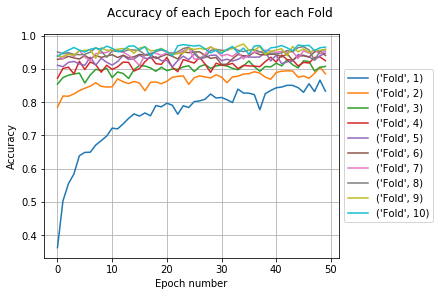

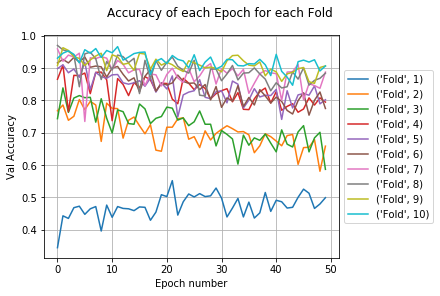

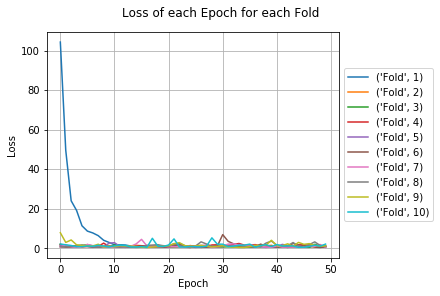

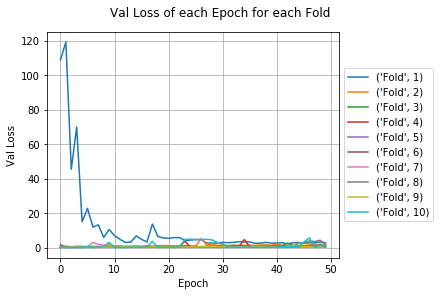

In [33]:
Graph_Epochs_model_4=Graph_func(Epoch_number,Epoch_array_accuracy_4,Val_accuracy_array_4,Loss_array_4,Val_Loss_array_4) 

In [34]:
Table_model_4=table_maker(Fold_accuracy_4,end_array_4,Avg_Accuracy_4,Time_4)

  Fold  Accuracy  Time Taken
0    1  0.763140    160.1146
1    2  0.865706    160.8326
2    3  0.899864    163.4373
3    4  0.914203    162.9427
4    5  0.929546    161.4410
5    6  0.938776    161.5654
6    7  0.945865    165.0852
7    8  0.951976    163.0886
8    9  0.955702    165.0105
9   10  0.960155    161.1570

    Average Accuracy  Total Time
0          0.912493   1624.6749


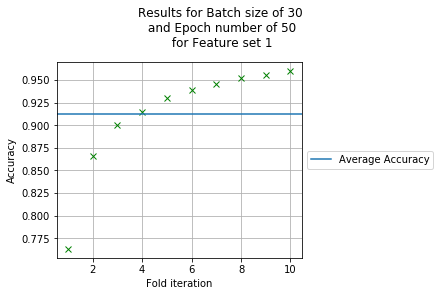

In [35]:
Graph_Avg_model_4=Graph_Avg_maker(Fold_accuracy_4,Avg_Accuracy_4)

In [36]:
X_train = np.vstack([X_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
y_train = np.vstack([Y_folds_10[j] for j in range(0, len(Y_folds_10)-1)])
X_test = X_folds_10[9]
y_test = Y_folds_10[9]

Epoch_number=30
cnn_model_4_history = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=Epoch_number)
score_model_4_no_cross=model_4.evaluate(X_test, y_test)
accuracy_model_4_no_cross = score_model_4_no_cross[1]
print(f"\nAccuracy of model 4 with no cross validation: {round(accuracy_model_4_no_cross,4)}")

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - ETA: 2s - loss: 0.2076 - accuracy: 0.96 - ETA: 2s - loss: 0.5135 - accuracy: 0.95 - ETA: 2s - loss: 0.7563 - accuracy: 0.95 - ETA: 2s - loss: 0.5805 - accuracy: 0.96 - ETA: 2s - loss: 0.6567 - accuracy: 0.95 - ETA: 2s - loss: 0.5736 - accuracy: 0.95 - ETA: 2s - loss: 0.5088 - accuracy: 0.96 - ETA: 2s - loss: 0.4550 - accuracy: 0.96 - ETA: 2s - loss: 0.5012 - accuracy: 0.95 - ETA: 2s - loss: 0.4942 - accuracy: 0.96 - ETA: 2s - loss: 0.4832 - accuracy: 0.96 - ETA: 2s - loss: 0.5243 - accuracy: 0.95 - ETA: 2s - loss: 0.4982 - accuracy: 0.95 - ETA: 2s - loss: 0.5339 - accuracy: 0.96 - ETA: 2s - loss: 0.5403 - accuracy: 0.95 - ETA: 2s - loss: 0.5370 - accuracy: 0.96 - ETA: 2s - loss: 0.5667 - accuracy: 0.96 - ETA: 2s - loss: 0.6305 - accuracy: 0.96 - ETA: 2s - loss: 0.6218 - accuracy: 0.96 - ETA: 2s - loss: 0.5952 - accuracy: 0.96 - ETA: 2s - loss: 0.5894 - accuracy: 0.96 - ETA: 2s - loss:

## Model Comparisson

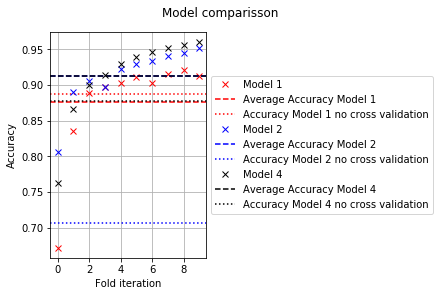

In [40]:
%matplotlib inline

fig, ax1 = plt.subplots(1, 1, constrained_layout=True, subplot_kw=dict())

ax1.plot(Fold_accuracy,"rx",label="Model 1")
ax1.axhline(y=Avg_Accuracy,label='Average Accuracy Model 1',color='r',ls="--")
ax1.axhline(y=accuracy_model_1_no_cross,label='Accuracy Model 1 no cross validation',color='r',ls=":")


ax1.plot(Fold_accuracy_2,"bx",label="Model 2")
ax1.axhline(y=Avg_Accuracy_2,label='Average Accuracy Model 2',color='b',ls="--")
ax1.axhline(y=accuracy_model_2_no_cross,label='Accuracy Model 2 no cross validation',color='b',ls=":")


#ax1.plot(Fold_accuracy_3,"gx",label="Model 3")
#ax1.axhline(y=Avg_Accuracy_3,label='Average Accuracy Model 3',color='g',ls="--")
#ax1.axhline(y=accuracy_model_3_no_cross,label='Accuracy Model 3 no cross validation',color='g',ls=":")

ax1.plot(Fold_accuracy_4,"kx",label="Model 4")
ax1.axhline(y=Avg_Accuracy_4,label='Average Accuracy Model 4',color='k',ls="--")
ax1.axhline(y=accuracy_model_4_no_cross,label='Accuracy Model 4 no cross validation',color='k',ls=":")

#ax1.set_title('Results for a batch size of',Batch_size,'and',Epoch_number,'.')
fig.suptitle(f"Model comparisson")
ax1.set_xlabel("Fold iteration")
ax1.set_ylabel("Accuracy")
ax1.grid()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Logistic regression results

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_folds, Y_folds = data_processor_log_reg(X_folds,Y_folds)

X_train = np.vstack([X_folds[j] for j in range(0, len(Y_folds)-1)])
y_train = np.vstack([Y_folds[j] for j in range(0, len(Y_folds)-1)])
X_test = X_folds[9]
y_test = Y_folds[9]

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))



/Users/sokratismourselas/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sokratismourselas/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sokratismourselas/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.49


/Users/sokratismourselas/opt/anaconda3/envs/r_env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


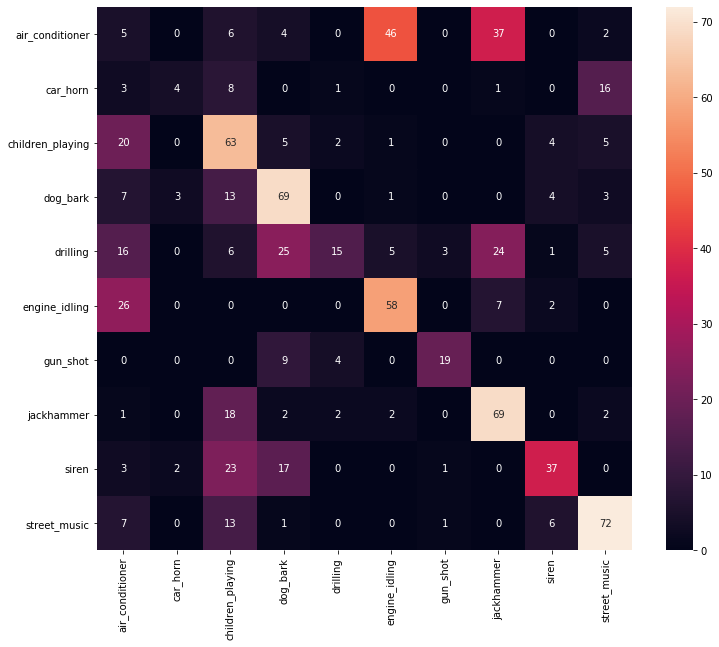

In [26]:
Confusion_matrix(X_test, y_test, model=logreg)